Figures & subplot

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

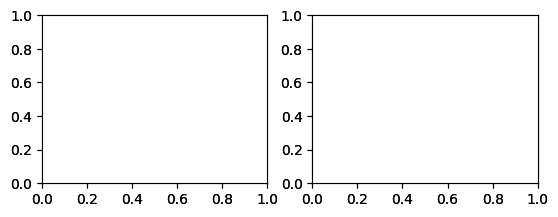

In [4]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
fig

In [5]:
ax3 = fig.add_subplot(2, 2, 3) 

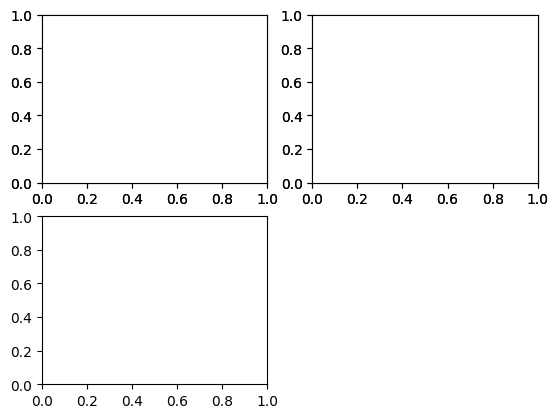

In [6]:
fig

In [19]:
from numpy.random import randn
ax3.plot(randn(50).cumsum(), linestyle = "dashed", color = "tomato")

In [20]:
# Note sur le fonctionnement de .cumsum()
rand_4 = randn(4)
print(rand_4)
print(rand_4.cumsum())

array([-0.99309486, -0.11930394, -0.3775283 , -0.30160049])

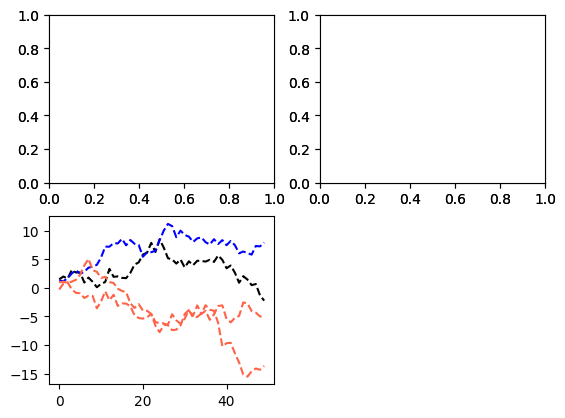

In [22]:
fig

In [ ]:
# Exercice

# En suivant le modèle ci-dessus qui utilise la méthode .plot(), remplir :

# - ax1 avec un histogramme. 
#   - On utilisera la méthode .hist(). 
#   - Le nombre de batons dans l'histogramme sera déterminé par la valeur du paramètres "bins"

# - ax2 avec un nuage de point. 
#   - On utilisera la méthode .scatter(), 
#   - on prendra soin de fournir les deux arguments suivants :
#       - vecteur des abscisses. aide : np.arange(N)
#       - vecteur des ordonnées
# Attention, ces deux vecteurs doivent avoir la même taille



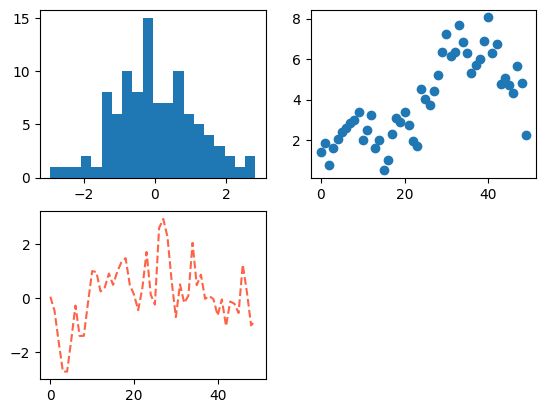

In [38]:
# Ex partie 1

fig_ex1 = plt.figure()

ax1_ex1 = fig_ex1.add_subplot(2, 2, 1)
ax2_ex1 = fig_ex1.add_subplot(2, 2, 2)
ax3_ex1 = fig_ex1.add_subplot(2, 2, 3) 

ax3_ex1.plot(randn(50).cumsum(), linestyle = "dashed", color = "tomato")

ax1_ex1.hist(randn(100), bins=20)

# ex partie 2
import numpy as np
N = 50
ax2_ex1.scatter(np.arange(N), randn(N).cumsum())


Connexion avec Pandas

<Axes: >

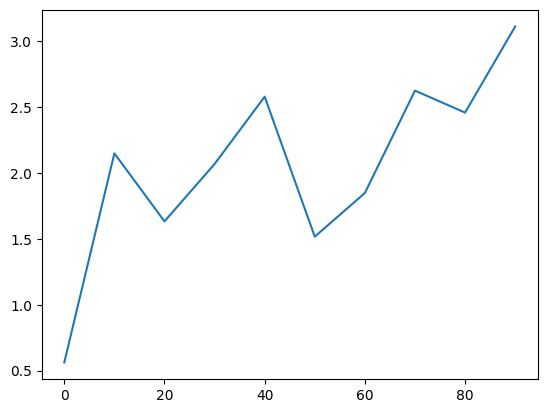

In [1]:
# plot d'une Series
import numpy as np
import pandas as pd

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

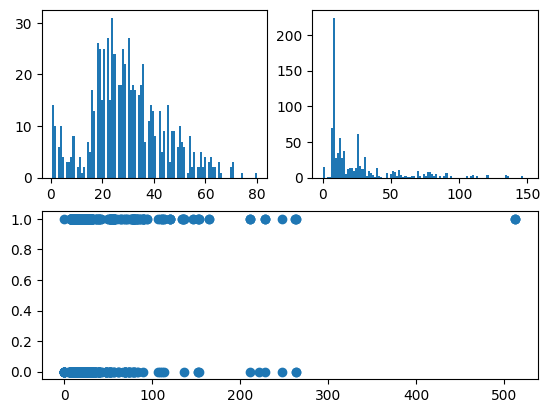

In [7]:
# Exercice
# Créer une nouvelle figure et, à partir des données du titanic, générer les trois graphes suivants 
# 1. histogramme des âges
# 2. histogramme des prix du ticket ("Fare")
# 3. un nuage de points (scatter plot) de la survie en fonction du prix du ticket

import pandas as pd
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_titanic = pd.read_csv(url)

fig_titanic = plt.figure()

ax_t_1 = fig_titanic.add_subplot(2, 2, 1)
ax_t_2 = fig_titanic.add_subplot(2, 2, 2)
ax_t_3 = fig_titanic.add_subplot(2, 1, 2)

ax_t_1.hist(df_titanic["Age"], bins = 100)
ax_t_2.hist(df_titanic["Fare"], bins = 100, range = (0, 150))
ax_t_3.scatter(df_titanic["Fare"], df_titanic["Survived"])

Génération d'une grille de graphes

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

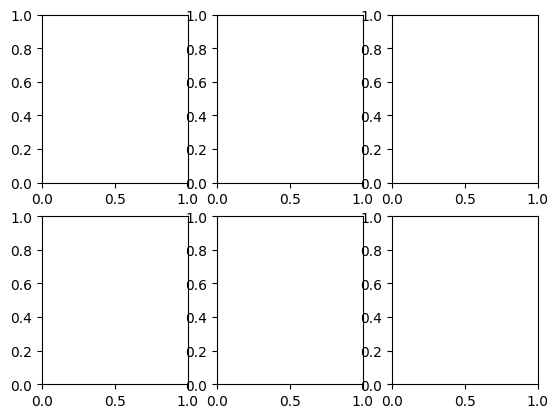

In [13]:
fig, axes = plt.subplots(2, 3)
axes

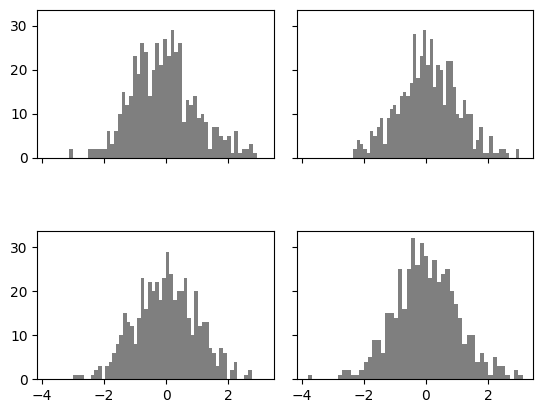

In [48]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True) 
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

Ticks, labels, legends

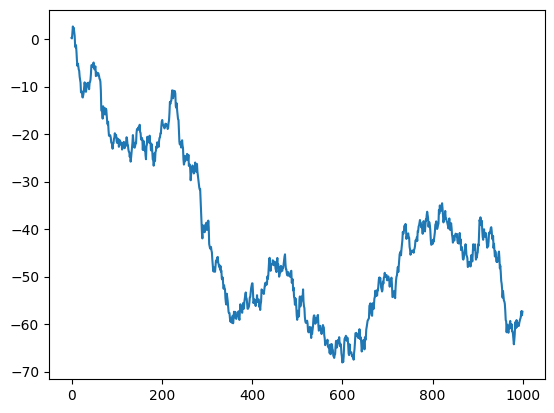

In [11]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

In [12]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

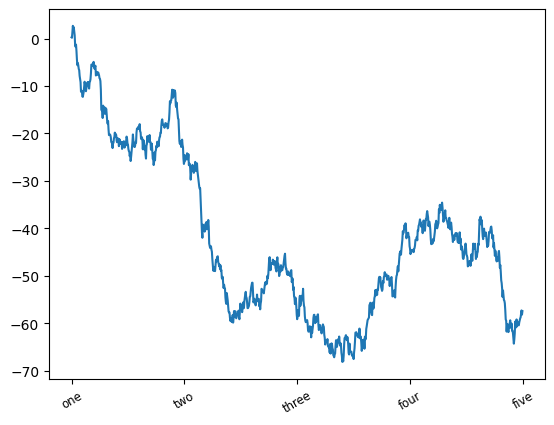

In [13]:
fig

In [ ]:
for axe in [ax1, ax2, ax3]:
    axe.legend(loc="best")

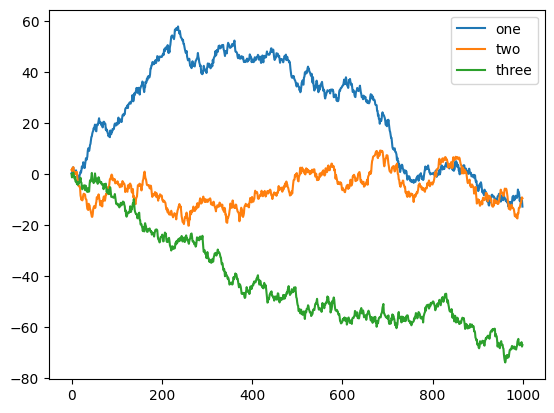

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(),  label='one')
ax.plot(randn(1000).cumsum(),  label='two')
ax.plot(randn(1000).cumsum(),  label='three')
ax.legend(loc='best')

<Axes: >

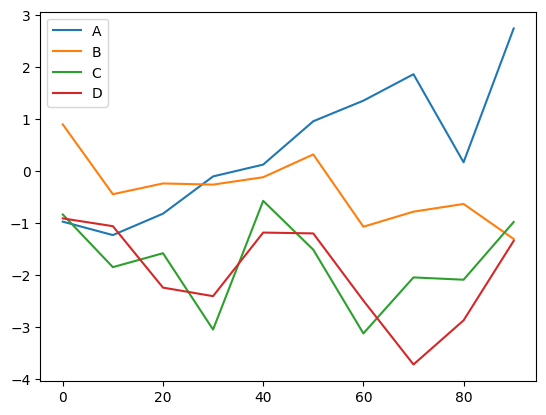

In [32]:
# plot d'un DataFrame
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), 
                  columns=['A', 'B', 'C', 'D'], 
                  index=np.arange(0, 100, 10)
                  )
df.plot()

<Axes: title={'center': 'Le mois de janvier. 4 tendances à suivre'}>

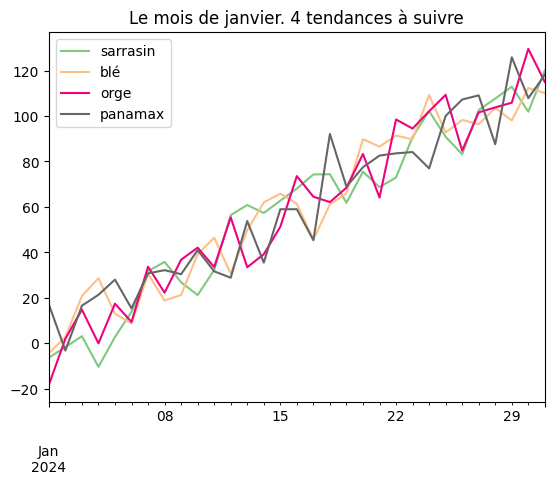

In [75]:
# Exercice
# Créer un dataframe avec 
#   - 4 colonnes composées de valeurs aléatoires 
#   - un index basé sur les jours du mois 01/2024
from datetime import datetime
data = np.arange(124).reshape(31, 4) + 10 * randn(31, 4)
df = pd.DataFrame(
    data, 
    index=[datetime(2024, 1, jour) for jour in range(1, 32)],
    columns= ["sarrasin", "blé", "orge", "panamax"]
    )

df.plot(title="Le mois de janvier. 4 tendances à suivre", colormap="Accent")


<Axes: title={'center': 'Le cours du blé sur la période 2020-2023'}>

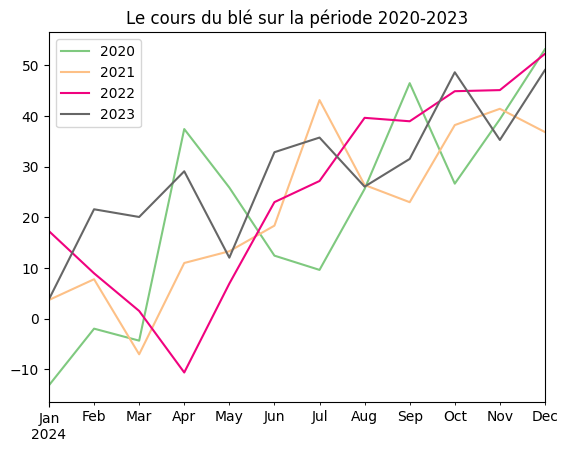

In [78]:
# 2e situation : un même cours à suivre pour le mois de janvier, pour les années 2020 à 2023
from datetime import datetime
data = np.arange(48).reshape(12, 4) + 10 * randn(12, 4)
df = pd.DataFrame(
    data, 
    index=[datetime(2024, mois, 1) for mois in range(1, 13)],
    columns= ["2020", "2021", "2022", "2023"]
    )

df.plot(title="Le cours du blé sur la période 2020-2023", colormap="Accent")

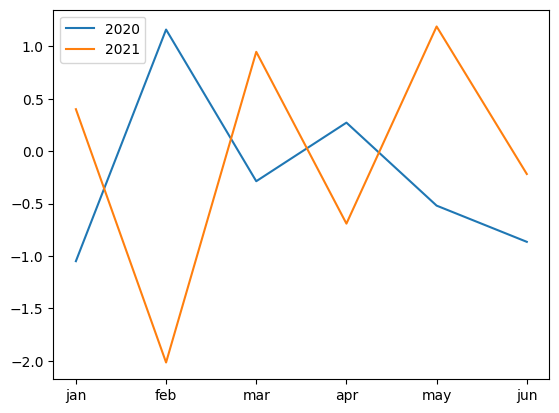

In [88]:
# 3e situation : idem que la 2, mais où les données de chaque année proviennent de plusieurs df
df_2020 = pd.DataFrame(
    index= ["jan", "feb", "mar", "apr", "may", "jun"],
    data = {"year" : [2020 for i in range(6)], "values" : randn(6)}
)

df_2021 = pd.DataFrame(
    index= ["jan", "feb", "mar", "apr", "may", "jun"],
    data = {"year" : [2021 for i in range(6)], "values" : randn(6)}
)

df_2020
df_2021

fig_ex_3, ax = plt.subplots(1, 1)
ax.plot(df_2020["values"], label=df_2020.iat[0,0])
ax.plot(df_2021["values"], label=df_2021.iat[0,0])
ax.legend(loc='best')


In [1]:
# 4e situation : idem que la 2, mais où les données de chaque année proviennent d'un unique df où la valeur du champ "year" varie 
import pandas as pd
from numpy.random import randn

df_2020_2021 = pd.DataFrame(
    index= ["jan", "feb", "mar", "apr", "may", "jun"] + ["jan", "feb", "mar", "apr", "may", "jun"],
    data = {
        "year" : [2020 for i in range(6)]+[2021 for i in range(6)], 
        "values" : randn(12)
        }
)

df_2020_2021


,year,values
jan,2020,-0.690943
feb,2020,0.452969
mar,2020,-1.413472
apr,2020,0.624271
may,2020,-0.020908
jun,2020,-0.922549
jan,2021,-1.853861
feb,2021,1.343790
mar,2021,-0.656551
apr,2021,-0.459142


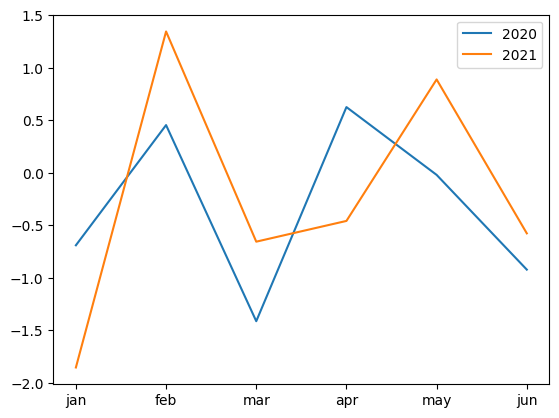

In [5]:
# 4e situation : suite
import matplotlib.pyplot as plt
fig_ex_3, ax = plt.subplots(1, 1)

for year in [2020, 2021]:
    filtered_df = df_2020_2021.loc[df_2020_2021["year"] == year, "values"]

    ax.plot(filtered_df, label=year)

ax.legend(loc='best')

In [56]:
# Exercice : créer une liste de datetime pour chaque jour de l'année
from datetime import timedelta

start_date = datetime(2024,1, 1)
N = 365

# solution 1
list_of_dates = []
for day_to_add in range(N+1):
    day = start_date + timedelta(day_to_add)
    list_of_dates.append(day)
    print(day)

# solution 2
date_range = [start_date + timedelta(day_to_add) for day_to_add in range(N+1)]

pd.DataFrame(..., index=date_range)

2024-01-01 00:00:00
2024-01-02 00:00:00
2024-01-03 00:00:00
2024-01-04 00:00:00
2024-01-05 00:00:00
2024-01-06 00:00:00
2024-01-07 00:00:00
2024-01-08 00:00:00
2024-01-09 00:00:00
2024-01-10 00:00:00
2024-01-11 00:00:00
2024-01-12 00:00:00
2024-01-13 00:00:00
2024-01-14 00:00:00
2024-01-15 00:00:00
2024-01-16 00:00:00
2024-01-17 00:00:00
2024-01-18 00:00:00
2024-01-19 00:00:00
2024-01-20 00:00:00
2024-01-21 00:00:00
2024-01-22 00:00:00
2024-01-23 00:00:00
2024-01-24 00:00:00
2024-01-25 00:00:00
2024-01-26 00:00:00
2024-01-27 00:00:00
2024-01-28 00:00:00
2024-01-29 00:00:00
2024-01-30 00:00:00
2024-01-31 00:00:00
2024-02-01 00:00:00
2024-02-02 00:00:00
2024-02-03 00:00:00
2024-02-04 00:00:00
2024-02-05 00:00:00
2024-02-06 00:00:00
2024-02-07 00:00:00
2024-02-08 00:00:00
2024-02-09 00:00:00
2024-02-10 00:00:00
2024-02-11 00:00:00
2024-02-12 00:00:00
2024-02-13 00:00:00
2024-02-14 00:00:00
2024-02-15 00:00:00
2024-02-16 00:00:00
2024-02-17 00:00:00
2024-02-18 00:00:00
2024-02-19 00:00:00


[datetime.datetime(2024, 1, 1, 0, 0),
 datetime.datetime(2024, 1, 2, 0, 0),
 datetime.datetime(2024, 1, 3, 0, 0),
 datetime.datetime(2024, 1, 4, 0, 0),
 datetime.datetime(2024, 1, 5, 0, 0),
 datetime.datetime(2024, 1, 6, 0, 0),
 datetime.datetime(2024, 1, 7, 0, 0),
 datetime.datetime(2024, 1, 8, 0, 0),
 datetime.datetime(2024, 1, 9, 0, 0),
 datetime.datetime(2024, 1, 10, 0, 0),
 datetime.datetime(2024, 1, 11, 0, 0),
 datetime.datetime(2024, 1, 12, 0, 0),
 datetime.datetime(2024, 1, 13, 0, 0),
 datetime.datetime(2024, 1, 14, 0, 0),
 datetime.datetime(2024, 1, 15, 0, 0),
 datetime.datetime(2024, 1, 16, 0, 0),
 datetime.datetime(2024, 1, 17, 0, 0),
 datetime.datetime(2024, 1, 18, 0, 0),
 datetime.datetime(2024, 1, 19, 0, 0),
 datetime.datetime(2024, 1, 20, 0, 0),
 datetime.datetime(2024, 1, 21, 0, 0),
 datetime.datetime(2024, 1, 22, 0, 0),
 datetime.datetime(2024, 1, 23, 0, 0),
 datetime.datetime(2024, 1, 24, 0, 0),
 datetime.datetime(2024, 1, 25, 0, 0),
 datetime.datetime(2024, 1, 26, 0,

<Axes: >

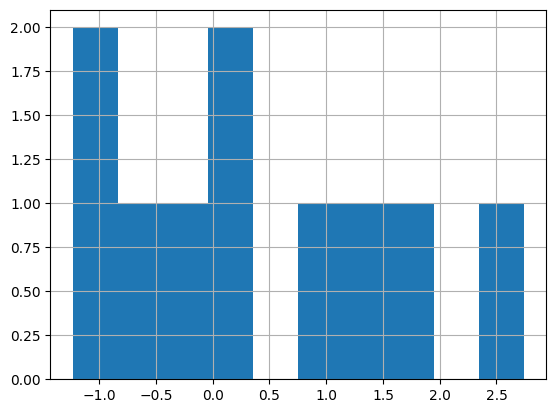

In [33]:
df["A"].hist()

<Axes: >

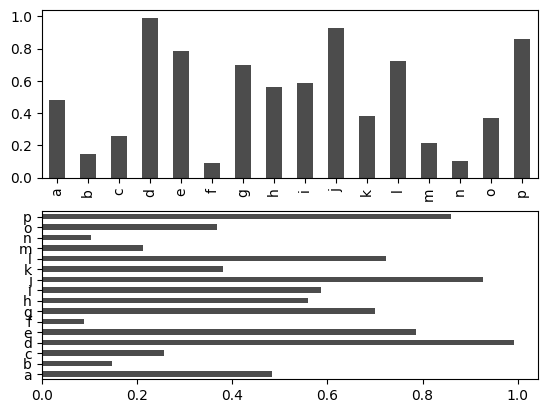

In [16]:
# bar plot d'un DataFrame
import pandas as pd
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [7]:
# bar plot d'un DataFrame
df = pd.DataFrame(np.random.rand(6, 4),
index=['one', 'two', 'three', 'four', 'five', 'six'],
columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

df

Genus,A,B,C,D
one,0.683186,0.717297,0.955547,0.007668
two,0.524345,0.246504,0.378702,0.997760
three,0.036663,0.615432,0.745396,0.230111
four,0.749335,0.605545,0.800854,0.810066
five,0.258434,0.846862,0.679248,0.780952
six,0.052639,0.932469,0.161539,0.136780


<Axes: >

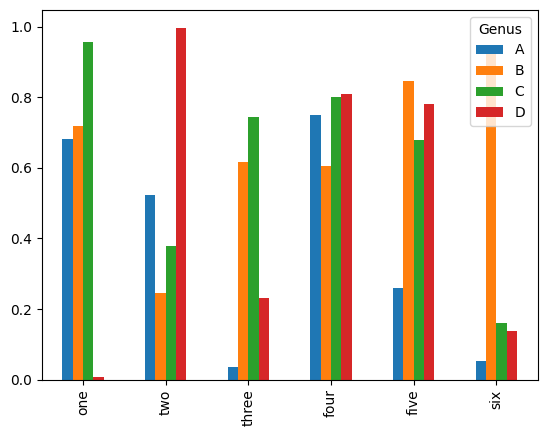

In [8]:
df.plot(kind='bar')

In [ ]:
# Exercice (difficile)
# Sur le même modèle, créer à partir des données du Titanic un histogramme avec le taux de survie en fonction des paramètres suivants : Sex, Pclass, 
# Le paramètre Pclass doit être représenté par les variations de couleurs (comme ici A, B, C...)
# Le paramètre Sex doit etre représenté en abscisse (comme "one", "two", etc.)

# Indice : observer le graphe précédent et noter comment doivent se situer les valeurs A, B, C ... et "one", "two", ... dans le dataframe
# A quoi doit ressembler le df en entrée ?

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64
=====***======
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


<Axes: xlabel='Sex'>

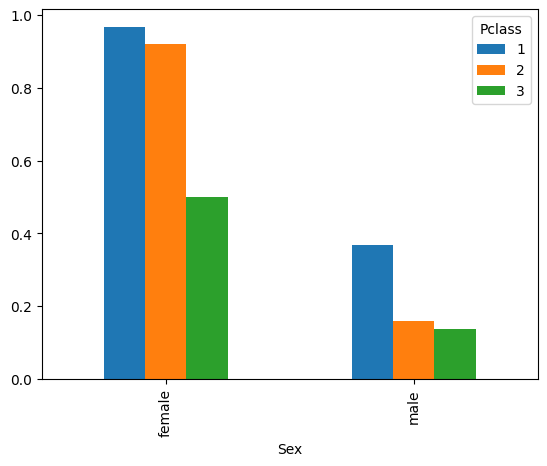

In [18]:
grouped_df = df_titanic.groupby(["Pclass", "Sex"])["Survived"].mean()
print(grouped_df)
# On obtient en sortie une Series avec un index multiple(Pclass et Sex)
# Pour coller avec le modèle précédent contenant le graphe avec les couleurs (A, B, C, D), il faut un df dont les colonnes sont les différentes valeurs de Pclass
print("=====***======")


# On utilise pour ça la méthode .unstack(), dont le paramètre 0 se réfère au premier niveau d'index (Pclass). 
# On pourra essayer d'appliquer .unstack(1) pour voir comment elle fonctionne
unstacked_df = grouped_df.unstack(0)
print(unstacked_df)

# On obtient la forme de DF souhaitée, on peut maintenant passer au plot
unstacked_df.plot(kind="bar")